# `PEST IDENTIFICATION`

Being able to identify the insects you see around your home or garden helps you to know if the insect is dangerous, an urban or agricultural pest, or beneficial.

When we know how insects live, what they eat, and how they interact with their environment, we can use different strategies (integrated pest management, or IPM) to manage them around our homes, crops, and other spaces we may share with them. This is especially important when our buggy friends start to bite when the weather gets warm!

We also need to know if an insect is beneficial in our environment. We don’t want to hurt our special pollinator friends or insects that eat pests in our gardens!

The following steps we have followed in this noteboook:
* Mounting the Drive
* Installing and Importing Libraries
* Loading the Data and Batch Forming
* Scaling the Pixel Values
* Loading the test data
* Creating a CNN Architecture and Training
* Testing the Model
* Saving the CNN Model in .h5 file

## `1. Mounting the Google Drive`

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive

/content/drive/MyDrive


In [ ]:
!pwd

/content/drive/MyDrive


## `2. Installing and Importing Libraries`

In [ ]:
!pip install tensorflow matplotlib opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.15.1
astropy                       5.2.1
astunparse                    1.6.3
attrs                         22.2.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
beautifulsoup4                4.11.2
bleach                        6.0.0
blis                          0.7.9
bokeh                         2.4.3
branca                        0.6.0
CacheControl                  0.12.11
cached-property               1.5.2
cachetools                    5.3.0
catalogue                     2.0.8
certifi                       2022.12.7


In [ ]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

## `3. Loading the Data`

In [ ]:
data_dir = 'pest_data'

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(os.path.join(data_dir,'train'))

Found 2967 files belonging to 10 classes.


The above used function `tf.keras.utils.image_dataset_from_directory` plays a very important role as it resizes all the images into (256,256,3) where 256x256 size and 3 channels i.e. RGB and is forming a batch of 32 images.

In [ ]:
batch = data.as_numpy_iterator().next()

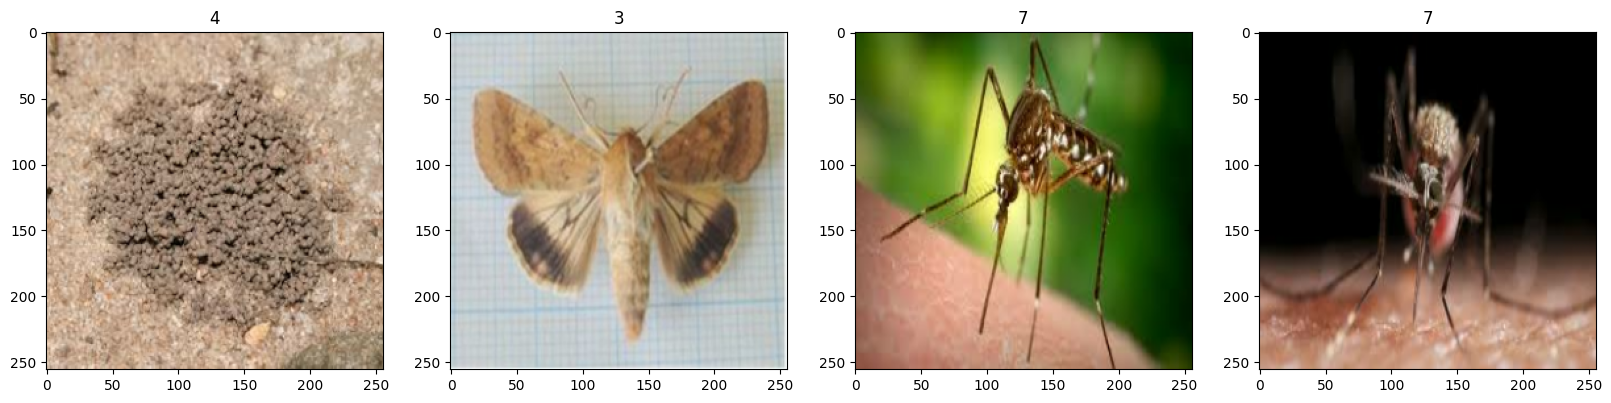

In [ ]:
# Visualising few images
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

So, we have 10 different classes in our dataset
1. aphids
2. armyworm
3. beetle
4. bollyworm
5. earthworm
6. grasshopper
7. mites
8. mosquito
9. sawfly
10. stem_borer

In [ ]:
len(data)

93

So, we have total 93 batches containing 32 images in each batch.

## `4. Scaling the Data`

In [ ]:
data = data.map(lambda x,y :(x/255,y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
b = data.as_numpy_iterator().next()
print(b[0].min(),b[0].max())


0.0 1.0


In [ ]:
len(b[0][0])

256

## `5. Loading the Test Data`

In [ ]:
test_data = tf.keras.utils.image_dataset_from_directory(os.path.join(data_dir,'test'))
test_data = test_data.map(lambda x,y :(x/255,y))

Found 500 files belonging to 10 classes.


## `6. Creating the CNN Model`

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten

In [ ]:
model = Sequential()

model.add(Conv2D(32, 3,  3, input_shape = (256, 256, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size =(2,2)))

model.add(Conv2D(32, 3,  3, activation = 'relu'))
model.add(MaxPooling2D(pool_size =(2,2)))

model.add(Conv2D(64, 3,  3, activation = 'relu'))
model.add(MaxPooling2D(pool_size =(2,2)))

# Flattening
model.add(Flatten())

#Full Connection
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.compile('adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 85, 85, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 42, 42, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 2, 2, 64)          18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 1, 1, 64)        

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
# Define early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
# Training the Model
hist = model.fit(data, epochs=20, validation_data=test_data,callbacks=[early_stop])

Epoch 1/20


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


93/93 [==============================] - 12s 106ms/step - loss: 2.2961 - accuracy: 0.1143 - val_loss: 2.2314 - val_accuracy: 0.1600
Epoch 2/20
93/93 [==============================] - 10s 105ms/step - loss: 2.1972 - accuracy: 0.1894 - val_loss: 2.1059 - val_accuracy: 0.2240
Epoch 3/20
93/93 [==============================] - 9s 89ms/step - loss: 2.0835 - accuracy: 0.2454 - val_loss: 1.9556 - val_accuracy: 0.2940
Epoch 4/20
93/93 [==============================] - 10s 106ms/step - loss: 1.9316 - accuracy: 0.3138 - val_loss: 1.8161 - val_accuracy: 0.3940
Epoch 5/20
93/93 [==============================] - 10s 103ms/step - loss: 1.6831 - accuracy: 0.4092 - val_loss: 1.4139 - val_accuracy: 0.5460
Epoch 6/20
93/93 [==============================] - 9s 89ms/step - loss: 1.4406 - accuracy: 0.4965 - val_loss: 1.1769 - val_accuracy: 0.6060
Epoch 7/20
93/93 [==============================] - 10s 105ms/step - loss: 1.1781 - accuracy: 0.5875 - val_loss: 1.0229 - val_accuracy: 0.6960
Epoch 8/20
93/

So, getting an accuracy of 93.60% on our training dataset.

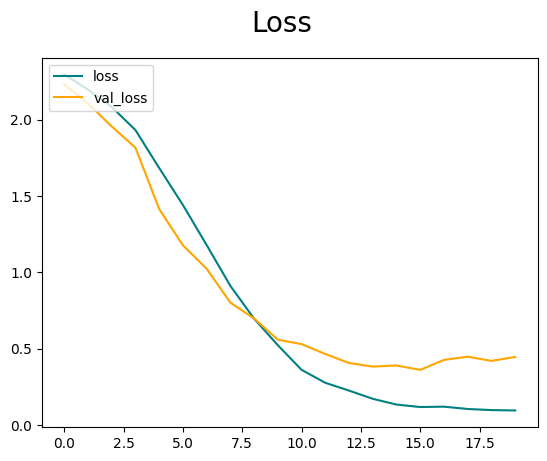

In [ ]:
# Plotting the loss curve
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

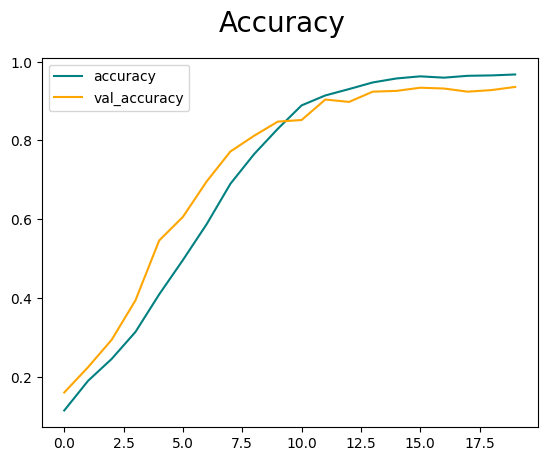

In [ ]:
# Plotting the accuracy curve
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## `7. Testing a model`

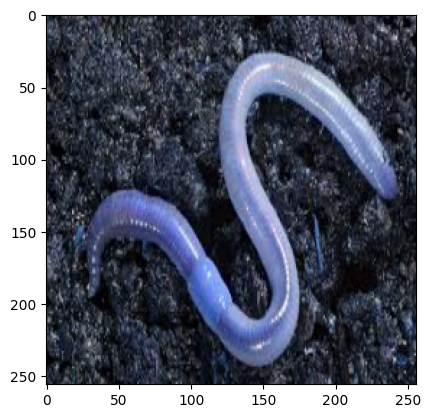

In [ ]:
classes = {
  0:'aphids',
  1:'armyworm',
  2:'beetle',
  3:'bollyworm',
  4:'earthworm',
  5:'grasshopper',
  6:'mites',
  7:'mosquito',
  8:'sawfly',
  9:'stem_borer'
}

import cv2
img = cv2.imread(os.path.join(data_dir,'check.jpg'))
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 138ms/step


In [ ]:
classes[yhat.argmax()]

'earthworm'

## `8. Saving the Model`

In [ ]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','pest_identification.h5'))